<a href="https://colab.research.google.com/github/RahulParajuli/ImageclassificationUsingCNN/blob/main/CNN_imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting google drive to access our dataset/ images for classification
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun Jun 19 15:57:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.show()

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Dataset/train')

['NORMAL', 'PNEUMONIA']

In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Dataset/test')

['PNEUMONIA', 'NORMAL']

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/train"
test_dir  = "/content/drive/MyDrive/Colab Notebooks/Dataset/test"
categories = ['NORMAL','PNEUMONIA']
train_dir
# test_dir

'/content/drive/MyDrive/Colab Notebooks/Dataset/train'

In [ ]:
# for category in categories:
#   path = os.path.join(train_dir, categories)
#   for img in os.listdir(path):
#     img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
#     plt.imshow(img_array, cmap = "gray")
#     plt.show()
#     break
#   break

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    #because it is a binary classification
    labels='inferred',
    class_names=None,
    #because we need coloured images
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=True,
  )

Found 40 files belonging to 2 classes.


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
   train_dir,
   labels = 'inferred',
   class_names = None,
   color_mode = 'rgb',
   batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=True,
)

Found 148 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


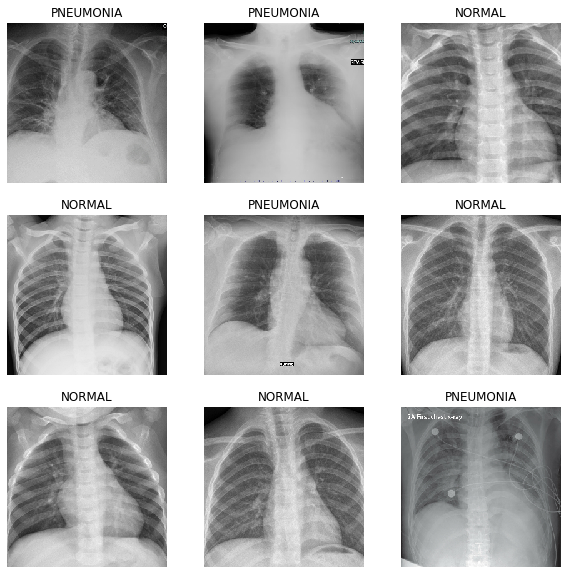

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 256, 256, 3)
(32,)


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#maxpooling
# 1 2
# 3 4
#__answer = 4

#https://iq.opengenus.org/relu-activation/

#padding
# 0------0
# 0------0
# 0------0
# 0------0
# 0------0
# 0------0
# 0------0

In [ ]:
his = model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

#what optimizer did you use
# Adam optimizer
# evaluation metrics
#--- binary cross entropy and false negatives

In [ ]:
his_model = model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#sparse categorical cross entropy

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [ ]:
#hyper parameters are - batch size, layers, epochs

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/10
5/5 [==============================] - 29s 4s/step - loss: 1.7261 - accuracy: 0.4459 - val_loss: 0.6741 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 4s 208ms/step - loss: 0.6883 - accuracy: 0.4797 - val_loss: 0.6824 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 4s 203ms/step - loss: 0.6501 - accuracy: 0.7230 - val_loss: 0.6089 - val_accuracy: 0.8500
Epoch 4/10
5/5 [==============================] - 4s 204ms/step - loss: 0.5644 - accuracy: 0.8378 - val_loss: 0.4787 - val_accuracy: 0.9000
Epoch 5/10
5/5 [==============================] - 4s 207ms/step - loss: 0.3901 - accuracy: 0.9189 - val_loss: 0.3007 - val_accuracy: 0.9000
Epoch 6/10
5/5 [==============================] - 4s 201ms/step - loss: 0.3027 - accuracy: 0.8784 - val_loss: 0.3350 - val_accuracy: 0.9000
Epoch 7/10
5/5 [==============================] - 4s 205ms/step - loss: 0.2039 - accuracy: 0.9189 - val_loss: 0.5994 - val_accuracy: 0.7500
Epoch 8/10
5/5 [======

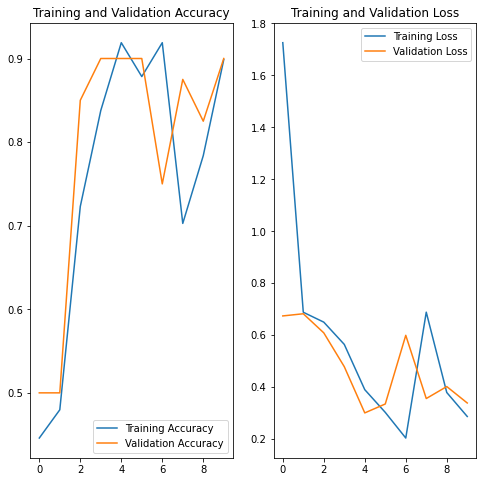

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#if there was overfitting, i.e. lines were far away, data augmentation can be done. which is rotate image.

# from keras.models import model_from_json
# from keras.models import load_model

# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#   json_file.write(model_json)

# model.save_weights("model.h5")
# print("saved model to disk")

# json_file = open('model.json','r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)

# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

# model.save('model.hdf5')
# loaded_model = load_model ('model.hdf5')

saved model to disk
Loaded model from disk


In [ ]:
# # test_image = cv2.imread('')
# # test_image = cv3.cvtColor(test=image, cv3.COLOR_BG2GREY)
# test_img = '/content/acc.jpg'
# test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
# test_img = cv2.resize(test_img,(256,256))
# test_img = np.array(test_img)
# test_img /= 255
# print(test_img.shape)

# print(model.predict(test_img))
# print(model.predict_classes(test_img))

In [ ]:
# import cv2
# import numpy as np
# from IPython.display import Image

# # image = '/content/acc.jpg'
# image = '/content/noa.jpg'
# test_img = cv2.imread(image)

# img = cv2.resize(test_img, (256,256))

# newimg = np.asarray(img)
# pixels = newimg.astype('ufloat8')
# pixels /= 255.0
# pixels = np.expand_dims(pixels, axis=0)
# # print(pixels.shape)

# prediction = model.predict(pixels)
# print(prediction)
# if (prediction[0][0] >= 0.5):
#  pic = 'Accident'
# else:
#  pic = 'Noaccident'



# print(pic)

# from IPython.display import Image
# Image(filename=image) 

# print(prediction)

In [ ]:
# path = "/content/no.jpg"
# # path = cv2.VideoCapture(0)
# pred = model.predict (path)
# img = load_img(path)
# if pred==0:
#   print("ACCIDENT")
# else:
#   print("NO ACCIDENT")
# plt.imshow(img)
# plt.title("input image")
# plt.show()

ACCIDENT


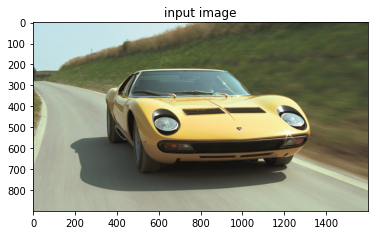

In [ ]:
# path = "/content/car.jpg"
# # path = cv2.VideoCapture(0)
# img = load_img(path)
# if pred==0:
#   print("ACCIDENT")
# else:
#   print("NO ACCIDENT")
# plt.imshow(img)
# plt.title("input image")
# plt.show()

This image most likely belongs to NORMAL with a 97.99 percent confidence.


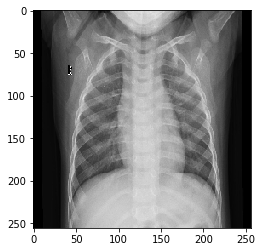

In [ ]:
image = "/content/drive/MyDrive/Colab Notebooks/Dataset/test/NORMAL/NORMAL2-IM-0035-0001.jpeg"

img = tf.keras.utils.load_img(
    image, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print( "This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))
plt.imshow(img)

This image most likely belongs to PNEUMONIA with a 70.01 percent confidence.


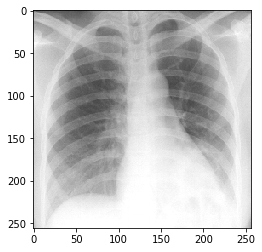

In [ ]:
image = "/content/drive/MyDrive/Colab Notebooks/Dataset/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg"

img = tf.keras.utils.load_img(
    image, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print( "This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))
plt.imshow(img)